In [3]:
import os
import sys
import pandas as pd

PROJECT_ROOT = os.path.abspath("..")
sys.path.insert(0, PROJECT_ROOT)

SPLITS_DIR = os.path.join(PROJECT_ROOT, "data", "splits")
MODELS_DIR = os.path.join(PROJECT_ROOT, "models", "naive_bayes")
PLOTS_DIR  = os.path.join(PROJECT_ROOT, "outputs", "plots")
PREDS_DIR  = os.path.join(PROJECT_ROOT, "outputs", "predictions")

os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(PREDS_DIR, exist_ok=True)

print("Paths ready")

Paths ready


In [2]:
train_df = pd.read_csv(os.path.join(SPLITS_DIR, "train.csv"))
val_df   = pd.read_csv(os.path.join(SPLITS_DIR, "val.csv"))
test_df  = pd.read_csv(os.path.join(SPLITS_DIR, "test.csv"))

display(train_df.head())
print(train_df["label"].value_counts())

,label,text,text_clean
0,ham,Cool. So how come you havent been wined and di...,cool. so how come you havent been wined and di...
1,ham,Huh so late... Fr dinner?,huh so late... fr dinner?
2,ham,my ex-wife was not able to have kids. Do you w...,my ex-wife was not able to have kids. do you w...
3,ham,Hope ur head doesn't hurt 2 much ! Am ploughin...,hope ur head doesn't hurt 2 much ! am ploughin...
4,ham,Ryder unsold.now gibbs.,ryder unsold.now gibbs.


label
ham     3613
spam     522
Name: count, dtype: int64


alpha=0.1 -> val F1=0.9280
alpha=0.5 -> val F1=0.8718
alpha=1.0 -> val F1=0.8421
Best alpha = 0.1 (val F1=0.9280)
Naive Bayes (Final) - Test Accuracy : 0.9884
Naive Bayes (Final) - Test Precision: 0.9836
Naive Bayes (Final) - Test Recall   : 0.9231
Naive Bayes (Final) - Test F1-score : 0.9524

Classification report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       452
        spam       0.98      0.92      0.95        65

    accuracy                           0.99       517
   macro avg       0.99      0.96      0.97       517
weighted avg       0.99      0.99      0.99       517

Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/outputs/plots/nb_confusion_matrix.png


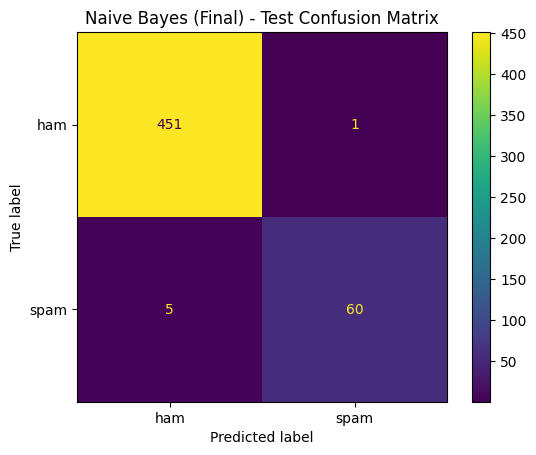

Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/outputs/plots/nb_roc_curve.png


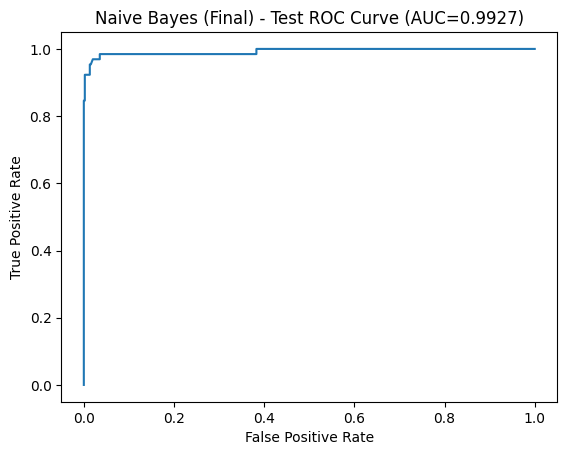

Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/outputs/plots/nb_pr_curve.png


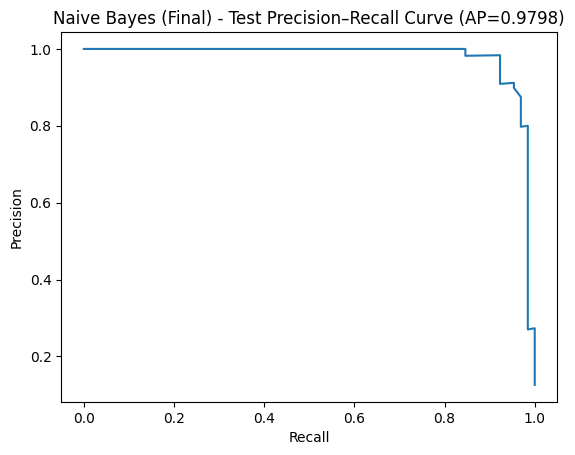

Saved sample predictions: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/outputs/predictions/nb_sample_predictions.csv
Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/outputs/plots/nb_top_features.png


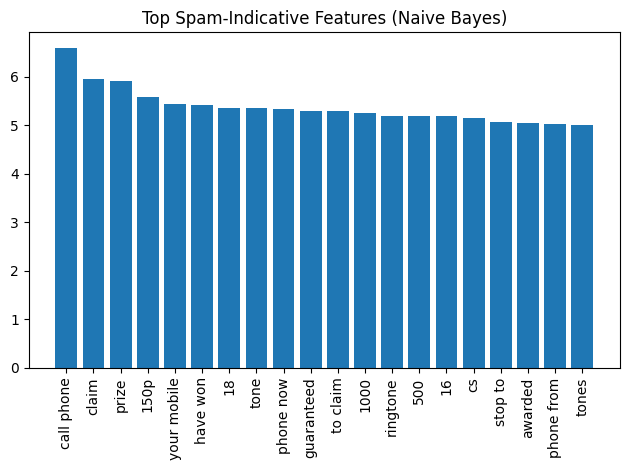

Saved vectorizer: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/models/naive_bayes/tfidf_vectorizer.pkl
Saved model     : /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/models/naive_bayes/nb_model.pkl
Saved metadata  : /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/models/naive_bayes/nb_metadata.json
Test metrics: {'accuracy': 0.988394584139265, 'precision': 0.9836065573770492, 'recall': 0.9230769230769231, 'f1': 0.9523809523809523, 'roc_auc': 0.992716133424098, 'ap': 0.979777341692037}


In [3]:
from src.train_nb import run_naive_bayes_pipeline

metrics = run_naive_bayes_pipeline(
    train_csv=os.path.join(SPLITS_DIR, "train.csv"),
    val_csv=os.path.join(SPLITS_DIR, "val.csv"),
    test_csv=os.path.join(SPLITS_DIR, "test.csv"),
    models_dir=MODELS_DIR,
    plots_dir=PLOTS_DIR,
    preds_dir=PREDS_DIR,
    seed=42,
    alphas=(0.1, 0.5, 1.0),
    tfidf_min_df=2,
    tfidf_max_df=0.95,
    tfidf_ngram_range=(1, 2)
)

print("Test metrics:", metrics)

In [6]:
import os
import pickle
import numpy as np

PROJECT_ROOT = os.path.abspath("..")
NB_DIR = os.path.join(PROJECT_ROOT, "models", "naive_bayes")

# Load vectorizer
with open(os.path.join(NB_DIR, "tfidf_vectorizer.pkl"), "rb") as f:
    tfidf = pickle.load(f)

# Load Naive Bayes model
with open(os.path.join(NB_DIR, "nb_model.pkl"), "rb") as f:
    nb_model = pickle.load(f)

print("Naive Bayes model and TF-IDF vectorizer loaded")

Naive Bayes model and TF-IDF vectorizer loaded


In [5]:
# SMS 1 for inference
sample_sms = "Congratulations! You have won a free voucher. Call now to claim."

# Transform using the same TF-IDF vectorizer
X_sample = tfidf.transform([sample_sms])

# Predict
pred_label = nb_model.predict(X_sample)[0]
pred_prob = nb_model.predict_proba(X_sample)[0][1]  # probability of spam

label_map = {0: "ham", 1: "spam"}

print("Message:", sample_sms)
print("Predicted label:", label_map[pred_label])
print("Spam probability:", round(float(pred_prob), 4))

Message: Congratulations! You have won a free voucher. Call now to claim.
Predicted label: spam
Spam probability: 0.9996


In [7]:
# SMS 2 for inference
sample_sms_2 = "Hey, are we still meeting at 5 pm today? Let me know."

X_2 = tfidf.transform([sample_sms_2])
pred_2 = nb_model.predict(X_2)[0]
prob_2 = nb_model.predict_proba(X_2)[0][1]

print("Message:", sample_sms_2)
print("Predicted label:", label_map[pred_2])
print("Spam probability:", round(float(prob_2), 4))

Message: Hey, are we still meeting at 5 pm today? Let me know.
Predicted label: ham
Spam probability: 0.0003


In [8]:
# SMS 3 for inference
sample_sms_3 = "You have been selected for a limited offer. Reply YES to know more."

X_3 = tfidf.transform([sample_sms_3])
pred_3 = nb_model.predict(X_3)[0]
prob_3 = nb_model.predict_proba(X_3)[0][1]

print("Message:", sample_sms_3)
print("Predicted label:", label_map[pred_3])
print("Spam probability:", round(float(prob_3), 4))

Message: You have been selected for a limited offer. Reply YES to know more.
Predicted label: spam
Spam probability: 0.8985


## Word Cloud
### Imports

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

os.makedirs("results", exist_ok=True)

### Spam feature importance extraction

In [ ]:
# Get feature names from TF-IDF vectorizer
feature_names = np.array(tfidf.get_feature_names_out())

# Extract log probabilities for spam class
spam_log_probs = nb_model.feature_log_prob_[1]

# Select top N features
TOP_N = 30
top_indices = np.argsort(spam_log_probs)[-TOP_N:]
top_words = feature_names[top_indices]
top_scores = spam_log_probs[top_indices]

# Convert to dictionary for WordCloud
word_importance = dict(zip(top_words, top_scores))

### Generate and save WordCloud

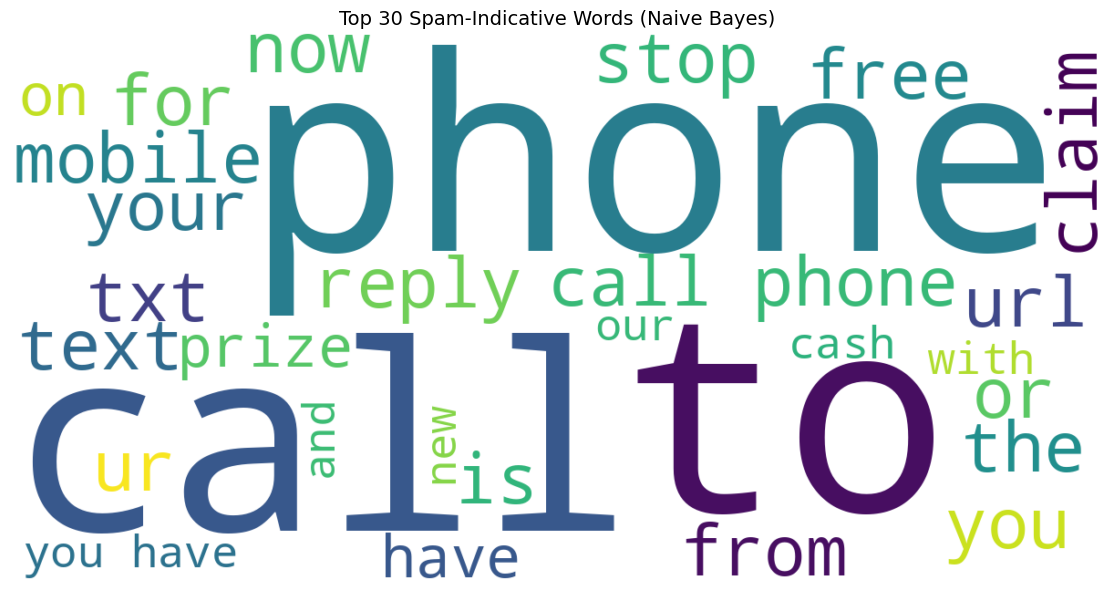

In [8]:
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    colormap="viridis"
).generate_from_frequencies(word_importance)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 30 Spam-Indicative Words (Naive Bayes)", fontsize=14)
plt.tight_layout()

plt.savefig("results/nb_spam_wordcloud.png", dpi=300, bbox_inches="tight")
plt.show()